# Sample Code

## 基礎建設

In [127]:
import nltk
import ssl
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context 
    
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nathan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/nathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import gzip, json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

## 載入資料

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty.csv
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_All_Beauty.json.gz

In [2]:
metadata = getDF('/content/meta_All_Beauty.json.gz')
ratings = pd.read_csv('/content/All_Beauty.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'], header=None)

In [4]:
metadata = pd.read_json("meta_All_Beauty.json", lines=True)
ratings = pd.read_json('All_Beauty.json', lines=True)

In [3]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [5]:
ratings = ratings[['asin', 'reviewerID', 'overall', 'unixReviewTime']]
ratings.head()

,asin,reviewerID,overall,unixReviewTime
0,0143026860,A1V6B6TNIC10QE,1,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4,1418860800
2,0143026860,A1572GUYS7DGSR,4,1407628800
3,0143026860,A1PSGLFK1NSVO,5,1362960000
4,0143026860,A6IKXKZMTKGSC,5,1324771200


## 資料整理

In [6]:
ratings['DATE'] = pd.to_datetime(ratings['unixReviewTime'], unit='s')

In [7]:
import numpy as np

def emptylist_na(cell):
    try:
        if len(cell) == 0:
            return np.nan
        else:
            return cell
    except:
        return cell
metadata_na = metadata.applymap(lambda x : emptylist_na(x))

In [9]:
metadata_na

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,NaN,NaN,[Loud 'N Clear Personal Sound Amplifier allows...,NaN,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,NaN,idea village,NaN,"2,938,573 in Beauty & Personal Care (",NaN,{'ASIN: ': '6546546450'},All Beauty,NaN,NaN,NaN,6546546450,NaN,NaN
1,NaN,NaN,[No7 Lift & Luminate Triple Action Serum 50ml ...,NaN,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",NaN,NaN,NaN,"872,854 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$44.99,7178680776,NaN,NaN
2,NaN,NaN,[No7 Stay Perfect Foundation now stays perfect...,NaN,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,NaN,No7,NaN,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$28.76,7250468162,NaN,NaN
3,NaN,NaN,NaN,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],NaN,NaN,NaN,"1,870,258 in Beauty & Personal Care (",NaN,"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,NaN,NaN,NaN,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,NaN,NaN,[Lacto Calamine Skin Balance Daily Nourishing ...,NaN,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,NaN,Pirmal Healthcare,NaN,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,NaN,NaN,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,NaN,NaN,NaN,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,{'ASIN: ': 'B01HIWLLUK'},All Beauty,NaN,NaN,$9.95,B01HIWLLUK,NaN,NaN
32888,NaN,NaN,NaN,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,NaN,Salon Perfect,NaN,"1,639,713 in Beauty & Personal Care (",NaN,"{'ASIN: ': 'B01HJ1K3YK', 'UPC:': '671635851871'}",All Beauty,NaN,NaN,NaN,B01HJ1K3YK,NaN,NaN
32889,NaN,NaN,NaN,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",NaN,NaN,NaN,"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,NaN,NaN,$55.63,B01HJ84SGM,NaN,NaN
32890,NaN,NaN,[Brand new and high quality<br> Enables fast v...,NaN,12 White Feather Shuttlecocks Birdies Badminto...,NaN,NaN,GBSTORE,NaN,"965,673 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$12.99,B01HJASD20,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [10]:
metadata_na.isna().sum().sort_values(ascending=False).to_frame(name='Number of NA').T

,category,fit,tech2,tech1,date,feature,similar_item,also_buy,also_view,price,description,imageURL,imageURLHighRes,brand,rank,details,title,main_cat,asin
Number of NA,32892,32892,32892,32882,32873,32623,31588,26295,24760,21433,17773,16351,16351,15673,377,132,1,0,0


In [135]:
metadata_clean = metadata_na[['asin', 'title', 'rank', 'brand', 'description', 'price']]
metadata_clean.head()

,asin,title,rank,brand,description,price
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,"2,938,573 in Beauty & Personal Care (",idea village,[Loud 'N Clear Personal Sound Amplifier allows...,NaN
1,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,"872,854 in Beauty & Personal Care (",NaN,[No7 Lift & Luminate Triple Action Serum 50ml ...,$44.99
2,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,"956,696 in Beauty & Personal Care (",No7,[No7 Stay Perfect Foundation now stays perfect...,$28.76
3,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,"1,870,258 in Beauty & Personal Care (",NaN,NaN,NaN
4,7414204790,Lacto Calamine Skin Balance Oil control 120 ml...,"67,701 in Beauty & Personal Care (",Pirmal Healthcare,[Lacto Calamine Skin Balance Daily Nourishing ...,$12.15


In [12]:
metadata_clean.duplicated(subset='asin').value_counts()

False    32488
True       404
dtype: int64

In [13]:
metadata_clean[metadata_clean.duplicated(subset='asin')]

,asin,title,rank,brand,description,price
425,B000050B67,Norelco 5655X Deluxe Advantage Wet/Dry Cordles...,"2,696,638 in Beauty & Personal Care (",NaN,[This water-resistant 6-watt electric razor ha...,.a-box-inner{background-color:#fff}#alohaBuyBo...
426,B000050B65,Norelco 6885XL Deluxe Quadra Action Cord/Cordl...,"2,639,859 in Beauty & Personal Care (",Norelco,[This high-tech shaver comes with an LCD indic...,NaN
427,B000050B60,Norelco 4821XL Micro Action Corded/Cordless Re...,"3,022,008 in Beauty & Personal Care (",Norelco,NaN,.a-box-inner{background-color:#fff}#alohaBuyBo...
428,B000050B69,Norelco T7500 Deluxe Cord/Cordless Rechargeabl...,"3,066,131 in Beauty & Personal Care (",NaN,[As an alternative to dull scissors wielded by...,NaN
429,B000050B62,Norelco 5841XL Deluxe Reflex Action Cord/Cordl...,"3,359,846 in Beauty &amp; Personal Care (",Norelco,[Model No. 5841XL. Rechargeable cord/cordless ...,\n\n\n<script
...,...,...,...,...,...,...
824,B00030AFN4,"Yellow Bird's ""Totally Redesigned"" Big Bird Pl...","597,652 in Beauty &amp; Personal Care (",Yellow Bird,NaN,NaN
825,B00030CA3C,PosTvac MANUAL VACUUM THERAPY PUMP [Rejoyn RVP...,"576,397 in Beauty & Personal Care (",REJOYN,[RVP Full System\n\nThe RVP is operated with a...,NaN
826,B00032A9TM,ECLIPSE MINTS WINTERFROST [Health and Beauty] ...,"2,266,650 in Beauty &amp; Personal Care (",Wrigley's,NaN,NaN
827,B0004E9ILY,Blush Magic Brown Annemarie Borlind 0.15 oz Co...,"3,094,362 in Beauty & Personal Care (",Annemarie Borlind,NaN,NaN


In [136]:
metadata_clean = metadata_clean.drop_duplicates(subset='asin').reset_index(drop=True)

In [15]:
metadata_clean.iloc[:5]['description'].tolist()

[["Loud 'N Clear Personal Sound Amplifier allows you to turn up the volume on what people around you are saying, listen at the level you want without disturbing others, hear a pin drop from across the room."],
 ['No7 Lift & Luminate Triple Action Serum 50ml by Boots'],
 ["No7 Stay Perfect Foundation now stays perfect for longer! Up to 24 hours wear for non-stop complexion perfection. Life-proof foundation for a naturally flawless complexion with super-staying power, uniquely matched to your skin tone using No7 Stay Perfect. This comfortable foundation feels lightweight and breathable, and gives an even-toned, beautifully smooth complexion that looks and feels fresh all day long. It can be relied upon to stay perfect; weather-proof and transfer-proof, it won't cake or flake on dry skin, nor slide or shine on oily skin. Up to 24 hours wear for non stop complexion perfection!"],
 nan,
 ['Lacto Calamine Skin Balance Daily Nourishing Lotion - Oil Control (120ml) (Pack Of 2)']]

In [137]:
metadata_clean['category'] = metadata_clean['rank'].str.split('in', expand=True)[1]
metadata_clean['rank'] = metadata_clean['rank'].str.split('in', expand=True)[0]

In [17]:
metadata_clean['category'].unique()

array([' Beauty & Personal Care (', ' Beauty &amp; Personal Care (', nan,
       ' Grocery & Gourmet Food (', ' Grocery &amp; Gourmet Food (',
       ' Health &amp; Household (', ' Sports & Outdoors (',
       ' Health & Household (', ' Toys & Games (', ' Baby (', ' Cloth',
       ' Home & Kitchen (', ' Automotive (',
       ' Tools & Home Improvement ('], dtype=object)

In [138]:
metadata_clean['category'] = metadata_clean['category'].str.replace('(', '').str.replace('amp;', '')

/var/folders/2s/39xl8cb90qgdd8tjmp249t0m0000gn/T/ipykernel_95006/2147980651.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  metadata_clean['category'] = metadata_clean['category'].str.replace('(', '').str.replace('amp;', '')


In [19]:
metadata_clean['category'].unique()

array([' Beauty & Personal Care ', nan, ' Grocery & Gourmet Food ',
       ' Health & Household ', ' Sports & Outdoors ', ' Toys & Games ',
       ' Baby ', ' Cloth', ' Home & Kitchen ', ' Automotive ',
       ' Tools & Home Improvement '], dtype=object)

In [139]:
metadata_clean['rank'] = pd.to_numeric(metadata_clean['rank'].str.replace(',', ''))

In [140]:
metadata_clean['price'] = pd.to_numeric(metadata_clean['price'].str.replace('$', ''), errors='coerce')

/var/folders/2s/39xl8cb90qgdd8tjmp249t0m0000gn/T/ipykernel_95006/1551151538.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  metadata_clean['price'] = pd.to_numeric(metadata_clean['price'].str.replace('$', ''), errors='coerce')


In [22]:
metadata_clean.dtypes

asin            object
title           object
rank           float64
brand           object
description     object
price          float64
category        object
dtype: object

In [141]:
metadata_clean['description'] = metadata_clean['description'].astype('string')

In [142]:
def clean_description(row):
    try:
        row = row.replace('[', '').replace(']', '')
        row = row.strip('"').strip("'")
        return row
    except:
        return row

In [143]:
metadata_clean['description'] = metadata_clean['description'].apply(clean_description)

In [144]:
metadata_clean = metadata_clean.replace(pd.NA, np.nan)

In [145]:
metadata_clean

,asin,title,rank,brand,description,price,category
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,2938573.0,idea village,Loud 'N Clear Personal Sound Amplifier allows ...,NaN,Beauty & Personal Care
1,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,872854.0,NaN,No7 Lift & Luminate Triple Action Serum 50ml b...,44.99,Beauty & Personal Care
2,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,956696.0,No7,No7 Stay Perfect Foundation now stays perfect ...,28.76,Beauty & Personal Care
3,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,1870258.0,NaN,NaN,NaN,Beauty & Personal Care
4,7414204790,Lacto Calamine Skin Balance Oil control 120 ml...,67701.0,Pirmal Healthcare,Lacto Calamine Skin Balance Daily Nourishing L...,12.15,Beauty & Personal Care
...,...,...,...,...,...,...,...
32483,B01HIWLLUK,"Barielle Pro Textured Grip Cuticle Nipper, Purple",2145325.0,NaN,NaN,9.95,Beauty & Personal Care
32484,B01HJ1K3YK,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,1639713.0,Salon Perfect,NaN,NaN,Beauty & Personal Care
32485,B01HJ84SGM,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,207410.0,NaN,NaN,55.63,Beauty & Personal Care
32486,B01HJASD20,12 White Feather Shuttlecocks Birdies Badminto...,965673.0,GBSTORE,Brand new and high quality<br> Enables fast vo...,12.99,Beauty & Personal Care


In [28]:
metadata_clean.dtypes

asin            object
title           object
rank           float64
brand           object
description     object
price          float64
category        object
dtype: object

In [146]:
metadata_clean['features'] = metadata_clean[['title', 'brand', 'description', 'category']].fillna('').sum(axis=1)

In [162]:
metadata_clean['features'] = metadata_clean['features'].str.lower()

In [163]:
metadata_clean

,asin,title,rank,brand,description,price,category,features,price_cate
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,2938573.0,idea village,Loud 'N Clear Personal Sound Amplifier allows ...,NaN,Beauty & Personal Care,loud clear trade personal sound amplifieridea ...,0
1,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,872854.0,NaN,No7 Lift & Luminate Triple Action Serum 50ml b...,44.99,Beauty & Personal Care,no7 lift amp luminate triple action serum boot...,4
2,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,956696.0,No7,No7 Stay Perfect Foundation now stays perfect ...,28.76,Beauty & Personal Care,no7 stay perfect foundation cool vanilla no7no...,3
3,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,1870258.0,NaN,NaN,NaN,Beauty & Personal Care,wella koleston perfect hair colour medium inte...,0
4,7414204790,Lacto Calamine Skin Balance Oil control 120 ml...,67701.0,Pirmal Healthcare,Lacto Calamine Skin Balance Daily Nourishing L...,12.15,Beauty & Personal Care,lacto calamine skin balance oil control ml pac...,2
...,...,...,...,...,...,...,...,...,...
32483,B01HIWLLUK,"Barielle Pro Textured Grip Cuticle Nipper, Purple",2145325.0,NaN,NaN,9.95,Beauty & Personal Care,barielle pro textured grip cuticle nipper purp...,2
32484,B01HJ1K3YK,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,1639713.0,Salon Perfect,NaN,NaN,Beauty & Personal Care,get free salon perfect eye makeup corrector st...,0
32485,B01HJ84SGM,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,207410.0,NaN,NaN,55.63,Beauty & Personal Care,now d-mannose veg capsules pack beauty persona...,4
32486,B01HJASD20,12 White Feather Shuttlecocks Birdies Badminto...,965673.0,GBSTORE,Brand new and high quality<br> Enables fast vo...,12.99,Beauty & Personal Care,white feather shuttlecocks birdies badminton t...,2


In [164]:
for i in metadata_clean['features'][3:4]:
    print(i)

wella koleston perfect hair colour medium intense red brown beauty personal care


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
metadata_clean['price'].describe()

count    11171.000000
mean        27.784923
std         47.212652
min          0.010000
25%          8.990000
50%         15.990000
75%         29.990000
max        999.990000
Name: price, dtype: float64

In [33]:
metadata_clean[metadata_clean['price']==999.99]

,asin,title,rank,brand,description,price,category,features
21074,B00ZGHOGE8,GaBBY &quot;Sweet Pea&quot; Double-Face Double...,917268.0,NaN,NaN,999.99,Beauty & Personal Care,GaBBY &quot;Sweet Pea&quot; Double-Face Double...
22851,B014GMX17Q,"Total Glitter Temporary Tattoos, 15 beautiful ...",689978.0,NaN,NaN,999.99,Beauty & Personal Care,"Total Glitter Temporary Tattoos, 15 beautiful ..."
28185,B01C6J086S,"Herbal Essentuality Hand Made Bath Bomb, 4.0 o...",382060.0,NaN,NaN,999.99,Beauty & Personal Care,"Herbal Essentuality Hand Made Bath Bomb, 4.0 o..."
31572,B01GCE7OO2,[AGE 20's] Essence Cover Pact 12.5g #21 (inclu...,487506.0,NaN,NaN,999.99,Beauty & Personal Care,[AGE 20's] Essence Cover Pact 12.5g #21 (inclu...
31732,B01GJO1266,Double Weft 100% Remy Human Hair Clip in Exten...,621101.0,NaN,NaN,999.99,Beauty & Personal Care,Double Weft 100% Remy Human Hair Clip in Exten...


In [120]:
def price_cate(row):
    if row['price'] < 9:
        return 1
    elif 9 <= row['price'] < 16:
        return 2
    elif 16 <= row['price'] < 30:
        return 3
    elif 30 <= row['price'] < 9999999:
        return 4
    else:
        return 0

In [147]:
metadata_clean['price_cate'] = metadata_clean.apply(lambda row : price_cate(row), axis = 1)

In [36]:
metadata_clean['price_cate'].value_counts()

0    21317
1     2902
3     2771
4     2756
2     2742
Name: price_cate, dtype: int64

In [69]:
metadata_clean

,asin,title,rank,brand,description,price,category,features,price_cate
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,2938573.0,idea village,Loud 'N Clear Personal Sound Amplifier allows ...,NaN,Beauty & Personal Care,Loud 'N Clear&trade; Personal Sound Amplifieri...,0
1,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,872854.0,NaN,No7 Lift & Luminate Triple Action Serum 50ml b...,44.99,Beauty & Personal Care,No7 Lift &amp; Luminate Triple Action Serum 50...,4
2,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,956696.0,No7,No7 Stay Perfect Foundation now stays perfect ...,28.76,Beauty & Personal Care,No7 Stay Perfect Foundation Cool Vanilla by No...,3
3,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,1870258.0,NaN,NaN,NaN,Beauty & Personal Care,Wella Koleston Perfect Hair Colour 44/44 Mediu...,0
4,7414204790,Lacto Calamine Skin Balance Oil control 120 ml...,67701.0,Pirmal Healthcare,Lacto Calamine Skin Balance Daily Nourishing L...,12.15,Beauty & Personal Care,Lacto Calamine Skin Balance Oil control 120 ml...,2
...,...,...,...,...,...,...,...,...,...
32483,B01HIWLLUK,"Barielle Pro Textured Grip Cuticle Nipper, Purple",2145325.0,NaN,NaN,9.95,Beauty & Personal Care,"Barielle Pro Textured Grip Cuticle Nipper, Pur...",2
32484,B01HJ1K3YK,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,1639713.0,Salon Perfect,NaN,NaN,Beauty & Personal Care,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,0
32485,B01HJ84SGM,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,207410.0,NaN,NaN,55.63,Beauty & Personal Care,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,4
32486,B01HJASD20,12 White Feather Shuttlecocks Birdies Badminto...,965673.0,GBSTORE,Brand new and high quality<br> Enables fast vo...,12.99,Beauty & Personal Care,12 White Feather Shuttlecocks Birdies Badminto...,2


Text(0.5, 1.0, 'Distribution of price_cate')

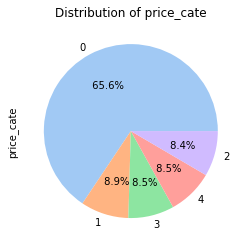

In [38]:
colors = sns.color_palette('pastel')[:5]
metadata_clean['price_cate'].value_counts().plot.pie(
    y = 'price_cate', 
    autopct=lambda p:f'{p: .1f}%', # , \n{p*ratings_trainings.shape[0]/100 :,g}
    colors = colors 
)
plt.title('Distribution of price_cate')

In [148]:
def tokenize_stopwords(row):
    tags = ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS', 'RP']
    words = nltk.word_tokenize(row['features'])
    pos_tags = nltk.pos_tag(words)
    pos_results = [word for word, pos in pos_tags if pos in tags]
    results = [token for token in pos_results if token not in stopwords.words("english")]
    results_string = ' '.join(results)
    return results_string

In [149]:
metadata_clean['features'] = metadata_clean.apply(lambda row : tokenize_stopwords(row), axis = 1)

In [150]:
metadata_clean

,asin,title,rank,brand,description,price,category,features,price_cate
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,2938573.0,idea village,Loud 'N Clear Personal Sound Amplifier allows ...,NaN,Beauty & Personal Care,Loud Clear trade Personal Sound Amplifieridea ...,0
1,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,872854.0,NaN,No7 Lift & Luminate Triple Action Serum 50ml b...,44.99,Beauty & Personal Care,No7 Lift amp Luminate Triple Action Serum Boot...,4
2,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,956696.0,No7,No7 Stay Perfect Foundation now stays perfect ...,28.76,Beauty & Personal Care,No7 Stay Perfect Foundation Cool Vanilla No7No...,3
3,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,1870258.0,NaN,NaN,NaN,Beauty & Personal Care,Wella Koleston Perfect Hair Colour Medium Inte...,0
4,7414204790,Lacto Calamine Skin Balance Oil control 120 ml...,67701.0,Pirmal Healthcare,Lacto Calamine Skin Balance Daily Nourishing L...,12.15,Beauty & Personal Care,Lacto Calamine Skin Balance Oil control ml Pac...,2
...,...,...,...,...,...,...,...,...,...
32483,B01HIWLLUK,"Barielle Pro Textured Grip Cuticle Nipper, Purple",2145325.0,NaN,NaN,9.95,Beauty & Personal Care,Barielle Pro Textured Grip Cuticle Nipper Purp...,2
32484,B01HJ1K3YK,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,1639713.0,Salon Perfect,NaN,NaN,Beauty & Personal Care,Get Free Salon Perfect Eye Makeup Corrector St...,0
32485,B01HJ84SGM,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,207410.0,NaN,NaN,55.63,Beauty & Personal Care,NOW D-Mannose Veg Capsules Pack Beauty Persona...,4
32486,B01HJASD20,12 White Feather Shuttlecocks Birdies Badminto...,965673.0,GBSTORE,Brand new and high quality<br> Enables fast vo...,12.99,Beauty & Personal Care,White Feather Shuttlecocks Birdies Badminton T...,2


## 資料切分

In [39]:
ratings_trainings = ratings[
    (ratings['DATE'] < '2018-09-01')
]
ratings_testings = ratings[
    (ratings['DATE'] >= '2018-09-01') & 
    (ratings['DATE'] <= '2018-09-30')
]
ratings_testings_by_user = ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user }
users = list(ratings_testings_by_user.keys())

## 產生推薦

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用標題所表示的 tfidf 矩陣
tf = TfidfVectorizer(analyzer='word')
tfidf_matrix = tf.fit_transform(metadata_clean['features'])

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
mapping = pd.Series(metadata_clean.index,index = metadata_clean['features'])

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=2):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        return []

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k))
    return res

In [383]:
# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, p, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        
        primary = []
        secondary = []
        for item in item_indices:
            if metadata_clean['price_cate'].iloc[item] == p:
                primary.append(item)
            else:
                secondary.append(item)
        primary.extend(secondary)
        return (metadata_clean['asin'].iloc[primary].tolist())
    except:
        return []

# 利用使用者購買過的商品產生推薦
def recommend_items(items, price_cate_list, k):
    res = []
    for d, p in zip(items, price_cate_list):
        res.extend(recommend_item(d, p, k))
    return res

In [168]:
def recommender(training_data, users, k, days):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    
    training_data = training_data[(training_data['DATE'] + datetime.timedelta(days = days)) > '2018-09-01']
    
#     '''
#     content-based
#     '''
    ratings_trainings = training_data
    ratings_info = training_data.groupby(by = ['asin'], as_index=False).agg(rating_count=('overall', 'size'), rating_mean=('overall', 'mean'))
#     recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['features'].tolist(), metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['price_cate'].tolist(), k) for user in users}
#     recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['features'], k) for user in users}
    for user in users:
        result = recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['features'], k)
        if result:
            recommendations[user] = result
        else:
            asin_ratings = ratings_info.sort_values(by = ['rating_count'], ascending=(False))['asin'][:k].tolist()
            recommendations[user] = asin_ratings
            
    return recommendations


In [ ]:
ratings_by_user = recommender(ratings_trainings, users)
ratings_by_user

## 結果評估

In [160]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    '''
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user:
        if d in ratings_by_user:
            total += len(set(ratings_by_user[d]) & set(ratings_testings_by_user[d]))

    score = total / len(ratings_testings)
    return score

evaluate(ratings_testings_by_user, ratings_by_user)

0.0847457627118644

In [169]:
len(list(range(30, 721, 30)))

24

In [171]:
import datetime

In [173]:
score_list = []
for k in list(range(5, 51, 5)):
    for days in list(range(30, 721, 30)):
        ratings_by_user = recommender(ratings_trainings, users, k, days)
        score = evaluate(ratings_testings_by_user, ratings_by_user)
        score_list.append(score)
result_df = pd.DataFrame(np.reshape(score_list, (10, 24)).T, index=pd.Index(list(range(30, 721, 30)), name='Days'), columns=pd.Index(list(range(5, 51, 5)), name='K'))
result_df

NameError: name 'scorelst' is not defined

In [174]:
result_df = pd.DataFrame(np.reshape(score_list, (10, 24)).T, index=pd.Index(list(range(30, 721, 30)), name='Days'), columns=pd.Index(list(range(5, 51, 5)), name='K'))
result_df

K,5,10,15,20,25,30,35,40,45,50
Days,,,,,,,,,,
30,0.088136,0.157627,0.159322,0.193220,0.247458,0.264407,0.283051,0.310169,0.333898,0.342373
60,0.096610,0.152542,0.164407,0.208475,0.222034,0.257627,0.279661,0.296610,0.308475,0.335593
90,0.100000,0.135593,0.157627,0.210169,0.218644,0.249153,0.261017,0.272881,0.279661,0.303390
120,0.098305,0.128814,0.154237,0.171186,0.198305,0.238983,0.245763,0.262712,0.267797,0.277966
150,0.098305,0.100000,0.130508,0.137288,0.152542,0.174576,0.218644,0.227119,0.255932,0.259322
180,0.098305,0.098305,0.120339,0.132203,0.152542,0.154237,0.177966,0.198305,0.206780,0.235593
210,0.098305,0.098305,0.120339,0.125424,0.138983,0.154237,0.157627,0.189831,0.203390,0.213559
240,0.098305,0.100000,0.118644,0.125424,0.125424,0.128814,0.157627,0.181356,0.201695,0.213559
270,0.098305,0.100000,0.118644,0.125424,0.125424,0.132203,0.144068,0.181356,0.201695,0.205085


In [396]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    '''
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user:
        if d in ratings_by_user:
            total += len(set(ratings_by_user[d]) & set(ratings_testings_by_user[d]))

    score = total / len(ratings_testings)
    return score

evaluate(ratings_testings_by_user, ratings_by_user)

0.003389830508474576